# DM1 Modèles graphiques probabilistes

In [1]:
import numpy as np
import matplotlib.pyplot as plt

dataTrain = np.loadtxt("classification_data_HWK1/classification_data_HWK1/classificationA.train")
dataTest = np.loadtxt("classification_data_HWK1/classification_data_HWK1/classificationA.test")


dataTrainB = np.loadtxt("classification_data_HWK1/classification_data_HWK1/classificationB.train")
dataTestB = np.loadtxt("classification_data_HWK1/classification_data_HWK1/classificationB.test")

dataTrainC = np.loadtxt("classification_data_HWK1/classification_data_HWK1/classificationC.train")
dataTestC = np.loadtxt("classification_data_HWK1/classification_data_HWK1/classificationC.test")

## Linear discriminant analysis

In [2]:
def LDA(dataTrain, dataTest, ech):
    n, p = dataTrain.shape
    n2, p2 = dataTest.shape
    
    mu1 = np.mean(dataTrain[dataTrain[0:,2] == 1][0:,0:2], axis=0) #mu1 chapeau
    mu0 = np.mean(dataTrain[dataTrain[0:,2] == 0][0:,0:2], axis=0) #mu0 chapeau

    s1 = dataTrain[dataTrain[0:,2] == 1][0:, 0:2] - mu1
    sig1 = np.dot(s1.transpose(), s1)

    s0 = dataTrain[dataTrain[0:,2] == 0][0:, 0:2] - mu0
    sig0 = np.dot(s0.transpose(), s0)

    sigma = (sig0 + sig1)/n #Sigma chapeau
    invsig = np.linalg.inv(sigma)  #Inverse de sigma chapeau

    print("Par maximum de vraissemblance, pour l'échantillon {0},\
    obtient les estimateurs suivants: \n".format(ech))
    print("mu0 = {0}\n mu1 = {1} \n sigma = \n {2}".format(mu0, mu1, sigma))

    
    pi = len(s1)/n #pi chapeau
    pa = np.log(pi/(1-pi))
    
    print("pi = {0}".format(pi))
    
    testes = np.zeros((n2, p2)) #On va essayer les prédictions sur l'échantillon de testes

    constante = np.dot(mu1*(1/2), np.dot(invsig, mu1.transpose())) - np.dot(mu0*(1/2),\
                                    np.dot(invsig, mu0.transpose()))
    mu = mu0-mu1

    for i, elm in enumerate(dataTest):
        coef = pa - np.dot(elm[0:2], np.dot(invsig, mu.transpose())) - constante

        testes[i, 0:2] = elm[0:2]
        testes[i, 2] = int(coef > 0)

    errors = sum(testes[0:, 2] != dataTest[0:, 2])
        #On calcule le taux d'erreurs
    print("The error rate of the estimation on the testing set is {0}/{1} or : {2}%"\
          .format(errors, n2, 100*errors/n2))
    
    #On prédit sur le train set pour calculer le taux d'erreur
    pred = np.zeros((n, p))
    for i, elm in enumerate(dataTrain):
        coef = pa - np.dot(elm[0:2], np.dot(invsig, mu.transpose())) - constante

        pred[i, 0:2] = elm[0:2]
        pred[i, 2] = int(coef > 0)
        

    
    errors2 = sum(pred[0:, 2] != dataTrain[0:, 2])
    
    print("The error rate of the estimation on the training set is {0}/{1} or : {2}%"\
          .format(errors2, n, 100*errors2/n))
    
    #On plot les graphiques
    x1 = np.linspace(-3, 3, 2) #Pour tracer la frontière
    x2 = (pa - constante - x1*(mu[0]*invsig[0,0] + mu[1]*invsig[0,1])) \
                        /(((mu[0]*invsig[1,0]) + (mu[1]*invsig[1,1])))
    
    a = plt.scatter(dataTrain[dataTrain[0:,2] == 1][0:,0], \
                    dataTrain[dataTrain[0:,2] == 1][0:,1], color="red", s=10)
    b = plt.scatter(dataTrain[dataTrain[0:,2] == 0][0:,0], \
                    dataTrain[dataTrain[0:,2] == 0][0:,1], color="blue", s=10)
    c = plt.plot(x1, x2, color="orange")

    plt.title("Linear discriminant analysis for data {0} on training set ".format(ech))
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend((a,b), ('Data with label 1','Data with label 0'), loc="upper right")
    plt.show()
    plt.close()

    a = plt.scatter(dataTest[dataTest[0:,2] == 1][0:,0], \
                    dataTest[dataTest[0:,2] == 1][0:,1], color="red", s=10)
    b = plt.scatter(dataTest[dataTest[0:,2] == 0][0:,0], \
                    dataTest[dataTest[0:,2] == 0][0:,1], color="blue",s=10)
    c = plt.plot(x1, x2, color="orange")
    
    plt.title("Linear discriminant analysis for data {0} on testing set ".format(ech))
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend((a,b), ('Data with label 1','Data with label 0'), loc="upper right")
    plt.show()
    plt.close()

Par maximum de vraissemblance, pour l'échantillon A,    obtient les estimateurs suivants: 

mu0 = [ 2.89970947 -0.893874  ]
 mu1 = [-2.69232004  0.866042  ] 
 sigma = 
 [[ 2.44190897 -1.13194024]
 [-1.13194024  0.61375465]]
pi = 0.3333333333333333
The error rate of the estimation on the testing set is 30/1500 or : 2.0%
The error rate of the estimation on the training set is 2/150 or : 1.3333333333333333%


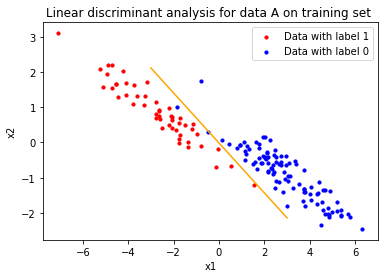

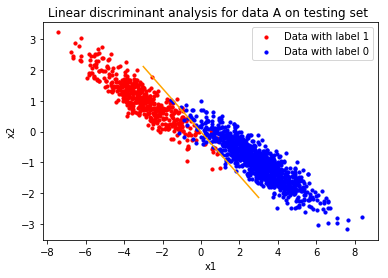

In [3]:
LDA(dataTrain, dataTest, "A")

Par maximum de vraissemblance, pour l'échantillon B,    obtient les estimateurs suivants: 

mu0 = [ 3.34068896 -0.83546333]
 mu1 = [-3.21670734  1.08306733] 
 sigma = 
 [[ 3.34623467 -0.13516489]
 [-0.13516489  1.73807475]]
pi = 0.5
The error rate of the estimation on the testing set is 83/2000 or : 4.15%
The error rate of the estimation on the training set is 9/300 or : 3.0%


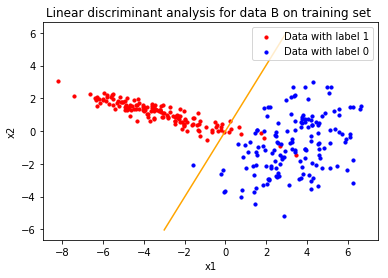

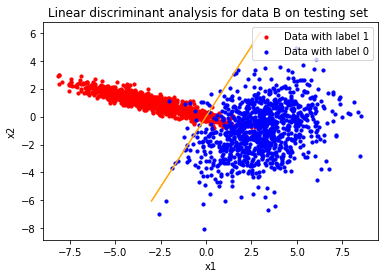

In [4]:
LDA(dataTrainB, dataTestB, "B")

Par maximum de vraissemblance, pour l'échantillon C,    obtient les estimateurs suivants: 

mu0 = [ 2.79304824 -0.83838667]
 mu1 = [-2.94232885 -0.9578284 ] 
 sigma = 
 [[ 2.88039225 -0.63405081]
 [-0.63405081  5.19952435]]
pi = 0.625
The error rate of the estimation on the testing set is 127/3000 or : 4.233333333333333%
The error rate of the estimation on the training set is 22/400 or : 5.5%


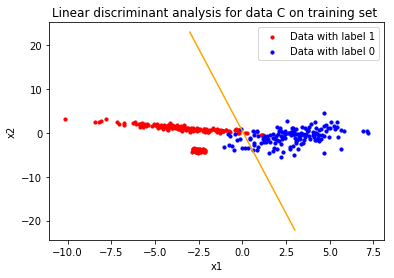

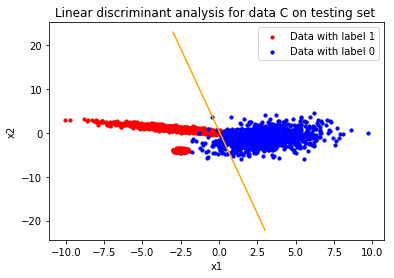

In [5]:
LDA(dataTrainC, dataTestC, "C")

## Logistic regression

In [6]:
def logistic(dataTrain, dataTest, ech):
    n, p = dataTrain.shape
    n2, p2 = dataTest.shape
    
    X = np.concatenate((np.ones((n, 1)), dataTrain[0:,0:2]), axis=1) #On rajoute la colonne de 1
    Y = dataTrain[0:, 2]

    def sigmoid(a): 
        return 1/(1+np.exp(-a))

    def IRLS(X, Y): #On implémente l'algorithme IRLS pour déterminer les coefficients de la régression 
                    #MLE par descente de gradient
        n, p = X.shape
        w = np.zeros((p, 1))
        eta = sigmoid(np.dot(X, w))
        D = np.array(np.diag(list(eta.transpose())[0]))

        wnext = w + np.dot(np.dot(np.linalg.inv(np.dot(X.transpose(), np.dot(D, X))), X.transpose()), Y.reshape(n,1) \
                           - eta)

        while max(abs(wnext - w)) > 1e-3:
            w = wnext
            eta = sigmoid(np.dot(X, w))
            D = np.array(np.diag(list(eta.transpose())[0]))
            wnext = w + np.dot(np.dot(np.linalg.inv(np.dot(X.transpose(), np.dot(D, X))), X.transpose()), Y.reshape(n,1) \
                               - eta)
        return wnext


    W = IRLS(X, Y)

    Xtilde = np.concatenate((np.ones((n2, 1)), dataTest[0:,0:2]), axis=1) #Echantillon de testes
    Ytilde = dataTest[0:, 2]


     #Paramètres appris:
    print("Via l'algorithme IRLS, on obtient comme paramètres appris: \n")
    print("W = {0}".format(W))

    predict = np.dot(W.transpose(), Xtilde.transpose())>0
    #On prédit les sur l'échantillon test (si on la proba d'ếtre dans 1 est plus grande que 1/2 on place l'observation
    #dans la classe 1, sinon elle va dans la classe 2


    #On calcule le taux d'erreur
    #Sur le testing set
    error = np.sum(Ytilde != predict)
    print("The error rate of the estimation on the testing set is {0}/{1} or {2}%"\
          .format(error, n2, 100*error/n2)) 
    
    #Sur le training set
    predictTrain = np.dot(W.transpose(),X.transpose())>0
    error2 = sum(Y != predictTrain[0])
    print("The error rate of the estimation on the training set is {0}/{1} or {2}%"\
    .format(error2, n, 100*error2/n))
    
    x1 = np.linspace(-5, 5, 2) #On trace la frontière
    x2 = (1/W[2])*(-x1*W[1] - W[0])


    a = plt.scatter(dataTrain[dataTrain[0:,2] == 1][0:,0],\
                    dataTrain[dataTrain[0:,2] == 1][0:,1], color="red", s=10)
    b = plt.scatter(dataTrain[dataTrain[0:,2] == 0][0:,0],\
                    dataTrain[dataTrain[0:,2] == 0][0:,1], color="blue", s=10)
    c = plt.plot(x1, x2, color="orange")

    plt.title("Logistic regression for data {0} on training set ".format(ech))
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend((a,b), ('Data with label 1','Data with label 0'), loc="upper right")
    plt.show()
    plt.close()

    a = plt.scatter(dataTest[dataTest[0:,2] == 1][0:,0],\
                    dataTest[dataTest[0:,2] == 1][0:,1], color="red", s=10)
    b = plt.scatter(dataTest[dataTest[0:,2] == 0][0:,0],\
                    dataTest[dataTest[0:,2] == 0][0:,1], color="blue", s=10)
    c = plt.plot(x1, x2, color="orange")

    plt.title("Logistic regression for data {0} on testing set ".format(ech))
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend((a,b), ('Data with label 1','Data with label 0'), loc="upper right")
    plt.show()
    plt.close()

Via l'algorithme IRLS, on obtient comme paramètres appris: 

W = [[ -4.70399596]
 [-24.80361334]
 [-42.13349832]]
The error rate of the estimation on the testing set is 53/1500 or 3.533333333333333%
The error rate of the estimation on the training set is 0/150 or 0.0%


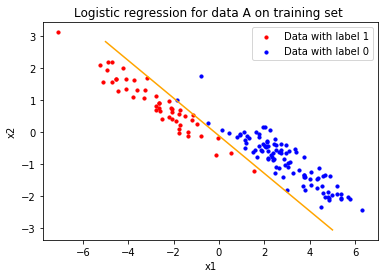

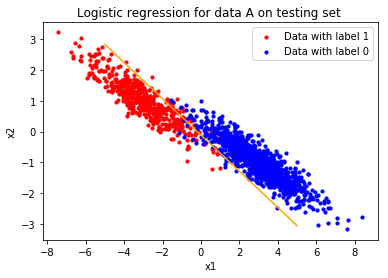

In [7]:
logistic(dataTrain, dataTest, "A")

Via l'algorithme IRLS, on obtient comme paramètres appris: 

W = [[ 1.03367852]
 [-1.49321724]
 [ 0.88179918]]
The error rate of the estimation on the testing set is 83/2000 or 4.15%
The error rate of the estimation on the training set is 6/300 or 2.0%


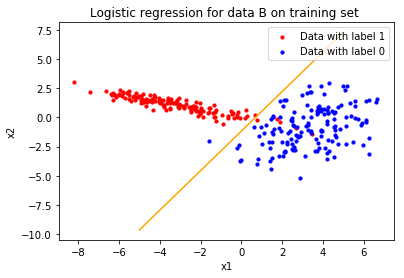

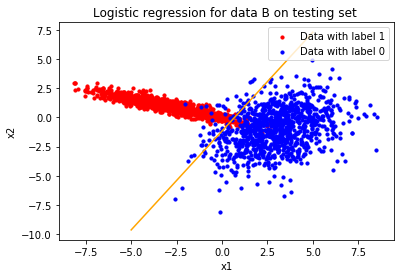

In [8]:
logistic(dataTrainB, dataTestB, "B")

Via l'algorithme IRLS, on obtient comme paramètres appris: 

W = [[ 0.65769293]
 [-1.90248234]
 [ 0.49839342]]
The error rate of the estimation on the testing set is 73/3000 or 2.433333333333333%
The error rate of the estimation on the training set is 16/400 or 4.0%


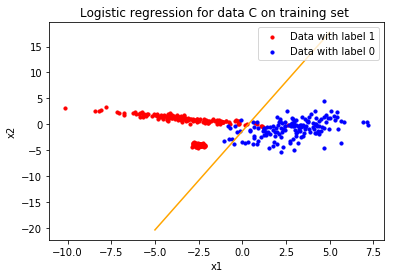

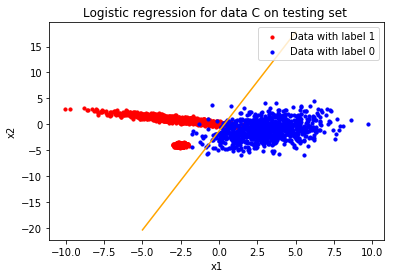

In [9]:
logistic(dataTrainC, dataTestC, "C")

## Linear regression

In [10]:
def linearReg(dataTrain, dataTest, ech):    
    n, p = dataTrain.shape
    n2, p2 = dataTest.shape
    
    X = np.concatenate((np.ones((n, 1)), dataTrain[0:,0:2]), axis=1) #On rajoute la colonne de 1
    Y = dataTrain[0:, 2]

    B = np.dot(np.dot(np.linalg.inv(np.dot(X.transpose(), X)), X.transpose()), Y).reshape(3,1)
    #On calcule beta chapeau par la formule qu'on connaît bien
   
    
    print("Via la formule de l'estimateur de Beta: \n")
    print("B = {0}".format(B))

    Xtilde = np.concatenate((np.ones((n2, 1)), dataTest[0:,0:2]), axis=1) #On ramène les échantillons de testes
    Ytilde = dataTest[0:, 2]

    predict = np.dot(Xtilde, B)>1/2 #On prédit les classes des testes
    
    #On calcule le taux d'erreurs
    #Sur le testing set
    error = np.sum(Ytilde != predict.transpose())
    print("The error rate of the estimation on the testing set is {0}/{1} or {2}%"\
          .format(error, n2, 100*error/n2))
    
    #Sur le training set
    predictTrain = np.dot(X, B)>1/2
    error2 = np.sum(Y != predictTrain.transpose())
    print("The error rate of the estimation on the training set is {0}/{1} or {2}%"\
          .format(error2, n, 100*error2/n))
    
    x1 = np.linspace(-5, 5, 2) #On calcule la frontière
    x2 = (1/B[2])*((1/2) - B[0] - x1*B[1])



    a = plt.scatter(dataTrain[dataTrain[0:,2] == 1][0:,0],\
                    dataTrain[dataTrain[0:,2] == 1][0:,1], color="red", s=10)
    b = plt.scatter(dataTrain[dataTrain[0:,2] == 0][0:,0],\
                    dataTrain[dataTrain[0:,2] == 0][0:,1], color="blue", s=10)
    c = plt.plot(x1, x2, color="orange")

    plt.title("Linear regression for data {0} on training set ".format(ech))
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend((a,b), ('Data with label 1','Data with label 0'), loc="upper right")
    plt.show()
    plt.close()

    a = plt.scatter(dataTest[dataTest[0:,2] == 1][0:,0],\
                    dataTest[dataTest[0:,2] == 1][0:,1], color="red", s=10)
    b = plt.scatter(dataTest[dataTest[0:,2] == 0][0:,0], \
                    dataTest[dataTest[0:,2] == 0][0:,1], color="blue", s=10)
    c = plt.plot(x1, x2, color="orange")

    plt.title("Linear regression for data {0} on testing set ".format(ech))
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend((a,b), ('Data with label 1','Data with label 0'), loc="upper right")
    plt.show()
    plt.close()

Via la formule de l'estimateur de Beta: 

B = [[ 0.49229204]
 [-0.2640075 ]
 [-0.37259311]]
The error rate of the estimation on the testing set is 31/1500 or 2.066666666666667%
The error rate of the estimation on the training set is 2/150 or 1.3333333333333333%


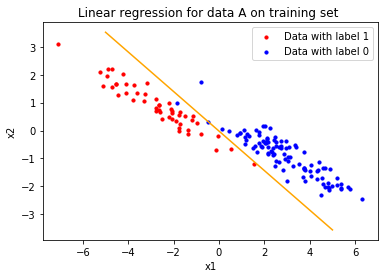

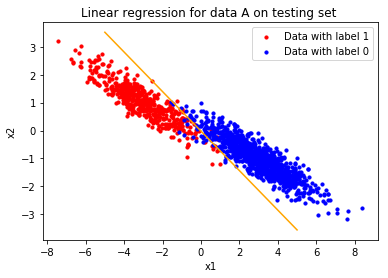

In [11]:
linearReg(dataTrain, dataTest, "A")

Via la formule de l'estimateur de Beta: 

B = [[ 0.50005043]
 [-0.10424575]
 [ 0.05179118]]
The error rate of the estimation on the testing set is 83/2000 or 4.15%
The error rate of the estimation on the training set is 9/300 or 3.0%


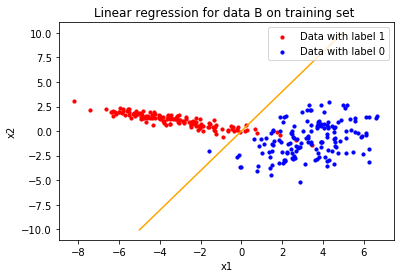

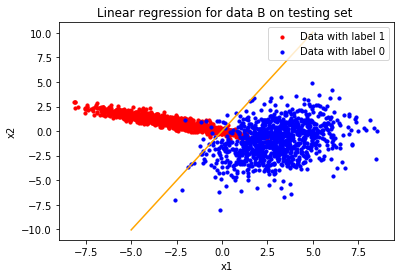

In [12]:
linearReg(dataTrainB, dataTestB, "B")

Via la formule de l'estimateur de Beta: 

B = [[ 0.50839982]
 [-0.12769333]
 [-0.01700142]]
The error rate of the estimation on the testing set is 127/3000 or 4.233333333333333%
The error rate of the estimation on the training set is 22/400 or 5.5%


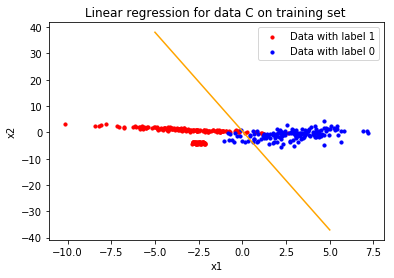

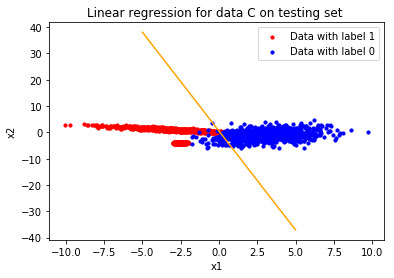

In [13]:
linearReg(dataTrainC, dataTestC, "C")

## Quadratic Discriminant Analysis

In [14]:
def QDA(dataTrain, dataTest, ech):
    n, p = dataTrain.shape
    n2, p2 = dataTest.shape
    
    mu1 = np.mean(dataTrain[dataTrain[0:,2] == 1][0:,0:2], axis=0) #mu1 chapeau
    mu0 = np.mean(dataTrain[dataTrain[0:,2] == 0][0:,0:2], axis=0) #mu0 chapeau

    s1 = dataTrain[dataTrain[0:,2] == 1][0:, 0:2] - mu1
    sig1 = np.dot(s1.transpose(), s1)/len(s1)

    s0 = dataTrain[dataTrain[0:,2] == 0][0:, 0:2] - mu0
    sig0 = np.dot(s0.transpose(), s0)/len(s0)

    invsig0 = np.linalg.inv(sig0)  #Inverse de sigma chapeau 0
    invsig1 = np.linalg.inv(sig1)  #Inverse de sigma chapeau 1
    
    print("Par maximum de vraissemblance, pour l'échantillon {0},\
    obtient les estimateurs suivants: \n".format(ech))
    print("mu0 = {0}\n mu1 = {1} \n sigma0 = \n {2} \n sigma1={3}".format(mu0, mu1, sig0, sig1))

    
    pi = len(s1)/n #pi chapeau
    pa = np.log(pi/(1-pi))

    
    print("pi = {0}".format(pi))
    
    testes = np.zeros((n2, p2)) #On va essayer les prédictions sur l'échantillon de testes

    constante = np.dot(mu1*(1/2), np.dot(invsig1, mu1.transpose())) - np.dot(mu0*(1/2),\
                                    np.dot(invsig0, mu0.transpose())) - pa + \
                                    (1/2)*np.log(np.linalg.det(sig1)/np.linalg.det(sig0))
    
    sigdifmu = np.dot(invsig0, mu0.transpose()) - np.dot(invsig1,mu1.transpose())
    sigdif = invsig1 - invsig0
    
    for i, elm in enumerate(dataTest):
        coef = -np.dot(elm[0:2], sigdifmu.transpose()) - constante \
            -(1/2)*np.dot(np.dot(elm[0:2], sigdif), elm[0:2].transpose())
        testes[i, 0:2] = elm[0:2]
        testes[i, 2] = int(coef > 0)

        #On calcule le taux d'erreurs
    error = sum(testes[0:, 2] != dataTest[0:, 2])
    print("The error rate of the estimation on the test set is {0}/{1} or {2}%"\
          .format(error, n2, 100*error/n2))
    
    
    #On prédit sur le train set pour calculer le taux d'erreur
    pred = np.zeros((n, p))
    for i, elm in enumerate(dataTrain):
        coef = -np.dot(elm[0:2], sigdifmu.transpose()) - constante \
            -(1/2)*np.dot(np.dot(elm[0:2], sigdif), elm[0:2].transpose())

        pred[i, 0:2] = elm[0:2]
        pred[i, 2] = int(coef > 0)
        
    error2 = sum(pred[0:, 2] != dataTrain[0:, 2])
    print("The error rate of the estimation on the training set is {0}/{1} or {2}%"\
          .format(error2, n, 100*error2/n))
    
    #On plot les graphiques
    
    def b(x):
        return (1/2)*x*sigdif[1,0] + (1/2)*x*sigdif[0,1] + sigdifmu[1]
    
    def c(x):
        return (1/2)*sigdif[0,0]*x**2 + sigdifmu[0]*x + constante
    
    def delta(x):
        return b(x)**2 - 2*sigdif[1,1]*c(x)
    
    x1 = np.linspace(-5, 10, 1000) #Pour tracer la frontière
    
    x1 = x1[delta(x1) >0]
    x2a = (-b(x1) + np.sqrt(delta(x1)))/sigdif[1,1]
    x2b = (-b(x1) - np.sqrt(delta(x1)))/sigdif[1,1]
    
    a = plt.scatter(dataTrain[dataTrain[0:,2] == 1][0:,0],\
                    dataTrain[dataTrain[0:,2] == 1][0:,1], color="red", s=10)
    b = plt.scatter(dataTrain[dataTrain[0:,2] == 0][0:,0],\
                    dataTrain[dataTrain[0:,2] == 0][0:,1], color="blue", s=10)
    c = plt.plot(x1, x2a, color="orange")
    d = plt.plot(x1, x2b, color="orange")
    
    
    plt.title("Quadratic discriminant analysis for data {0} on training set ".format(ech))
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend((a,b), ('Data with label 1','Data with label 0'), loc="upper right")
    plt.show()
    plt.close()

    a = plt.scatter(dataTest[dataTest[0:,2] == 1][0:,0],\
                    dataTest[dataTest[0:,2] == 1][0:,1], color="red", s=10)
    b = plt.scatter(dataTest[dataTest[0:,2] == 0][0:,0],\
                    dataTest[dataTest[0:,2] == 0][0:,1], color="blue", s=10)
    c = plt.plot(x1, x2a, color="orange")
    d = plt.plot(x1, x2b, color="orange")
    
    plt.title("Quadratic discriminant analysis for data {0} on testing set ".format(ech))
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend((a,b), ('Data with label 1','Data with label 0'), loc="upper right")
    plt.show()
    plt.close()

Par maximum de vraissemblance, pour l'échantillon A,    obtient les estimateurs suivants: 

mu0 = [ 2.89970947 -0.893874  ]
 mu1 = [-2.69232004  0.866042  ] 
 sigma0 = 
 [[ 2.31065259 -1.04748461]
 [-1.04748461  0.57578403]] 
 sigma1=[[ 2.70442172 -1.3008515 ]
 [-1.3008515   0.68969588]]
pi = 0.3333333333333333
The error rate of the estimation on the test set is 30/1500 or 2.0%
The error rate of the estimation on the training set is 1/150 or 0.6666666666666666%


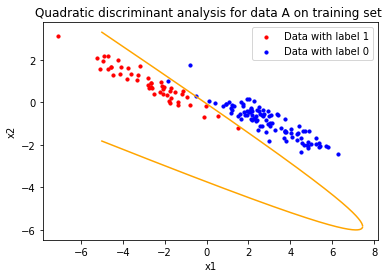

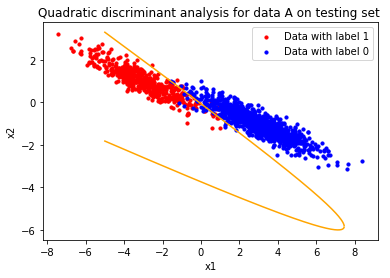

In [15]:
QDA(dataTrain, dataTest, 'A')

Par maximum de vraissemblance, pour l'échantillon B,    obtient les estimateurs suivants: 

mu0 = [ 3.34068896 -0.83546333]
 mu1 = [-3.21670734  1.08306733] 
 sigma0 = 
 [[ 2.53885859  1.0642112 ]
 [ 1.0642112   2.96007891]] 
 sigma1=[[ 4.15361075 -1.33454097]
 [-1.33454097  0.51607059]]
pi = 0.5
The error rate of the estimation on the test set is 40/2000 or 2.0%
The error rate of the estimation on the training set is 4/300 or 1.3333333333333333%


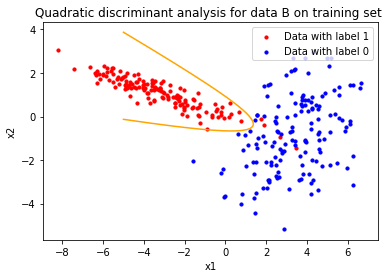

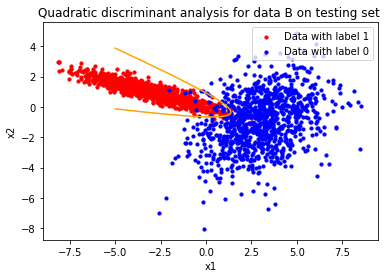

In [16]:
QDA(dataTrainB, dataTestB, 'B')

Par maximum de vraissemblance, pour l'échantillon C,    obtient les estimateurs suivants: 

mu0 = [ 2.79304824 -0.83838667]
 mu1 = [-2.94232885 -0.9578284 ] 
 sigma0 = 
 [[ 2.89913927  1.24581553]
 [ 1.24581553  2.92475448]] 
 sigma1=[[ 2.86914403 -1.76197061]
 [-1.76197061  6.56438626]]
pi = 0.625
The error rate of the estimation on the test set is 115/3000 or 3.8333333333333335%
The error rate of the estimation on the training set is 21/400 or 5.25%


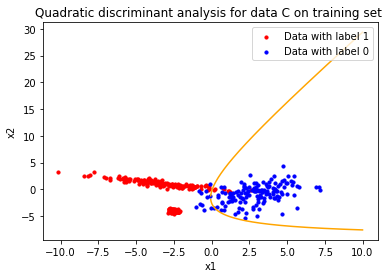

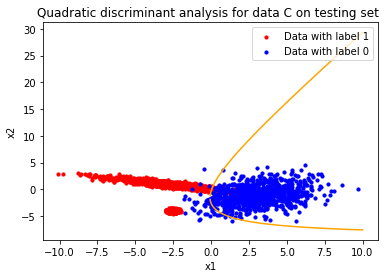

In [17]:
QDA(dataTrainC, dataTestC, 'C')